# ML Price Prediction - Training and Testing Demo

This notebook demonstrates the complete machine learning pipeline for cryptocurrency price prediction.

## Features:
- **3-class classification**: Short (-1), Flat (0), Long (1)
- **Multiple ML models**: Logistic Regression, XGBoost, Random Forest, LightGBM, etc.
- **Feature engineering**: Technical indicators (RSI, MACD, Bollinger Bands, etc.)
- **Model evaluation**: Confusion matrices, classification reports
- **Training on historical data**, testing on future data

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import training functions
from src.model_training import train, test
from src.visualization import print_model_summary
from src.data_preparation import prepare_data
from src.FeaturesGenerator import FeaturesGenerator


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Libraries imported successfully!")

✓ CPU cores available: 12
✓ Libraries imported successfully!


## 2. Load Data

In [5]:
# Data paths
PATH_TRAIN = 'data/hour/btc.csv'
PATH_TEST = 'data/hour/btc_2025.csv'

# Load training data
print('Loading training data...')
df_train = pd.read_csv(PATH_TRAIN)
print(f'Training data shape: {df_train.shape}')
print(f'Columns: {list(df_train.columns)}')

# Load test data
print('\nLoading test data...')
df_test = pd.read_csv(PATH_TEST)
print(f'Test data shape: {df_test.shape}')

# Display first few rows
print('\nFirst 5 rows of training data:')
df_train.head()

Loading training data...
Training data shape: (64524, 6)
Columns: ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']

Loading test data...
Test data shape: (7184, 6)

First 5 rows of training data:


,Timestamp,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807


In [6]:
fg = FeaturesGenerator()
# Create TRAIN features
target_bars = 15
target_pct = 1
X, y = prepare_data(df_train, target_bars, target_pct)
X_with_target = X.copy()
X_with_target['target'] = y
print(f'Features: \n{X}')
fg.test_features(X_with_target)

Features: 
       SMA_cross_10  SMA_cross  RSI_cross_min  STOCH_cross_min  \
0                 0          0              0                0   
1                 0          0              0                0   
2                 0          0              0                0   
3                 0          0              0                0   
4                 0          0              0                0   
...             ...        ...            ...              ...   
64504             0          0              0                0   
64505             0          0              0                0   
64506             1          0              0                0   
64507             0          0              0                0   
64508             0          0              0                0   

       BOLLINGER_cross_mid  Return_15  Return_1       RSI   STOCH_K   STOCH_D  
0                        0   0.000000  0.000000  0.000000  0.000000  0.000000  
1                        0   0.00000

{'correlation_df':                Feature  Correlation  Abs_Correlation
 1            SMA_cross     0.015678         0.015678
 5            Return_15     0.013892         0.013892
 6             Return_1    -0.011987         0.011987
 8              STOCH_K    -0.010460         0.010460
 3      STOCH_cross_min    -0.007896         0.007896
 7                  RSI    -0.007497         0.007497
 9              STOCH_D    -0.007010         0.007010
 0         SMA_cross_10    -0.006152         0.006152
 2        RSI_cross_min    -0.003257         0.003257
 4  BOLLINGER_cross_mid    -0.002619         0.002619,
 'mutual_info_df':                Feature  MI_Score
 6             Return_1  0.019781
 5            Return_15  0.016442
 4  BOLLINGER_cross_mid  0.003255
 7                  RSI  0.001729
 1            SMA_cross  0.001266
 0         SMA_cross_10  0.000414
 8              STOCH_K  0.000003
 2        RSI_cross_min  0.000000
 3      STOCH_cross_min  0.000000
 9              STOCH_D  0.00

In [7]:
# Create TEST features
X_test, y_test = prepare_data(df_test, target_bars, target_pct)
X_test_with_target = X.copy()
X_test_with_target['target'] = y
print(f'Features: \n{X}')
fg.test_features(X_test_with_target)

Features: 
       SMA_cross_10  SMA_cross  RSI_cross_min  STOCH_cross_min  \
0                 0          0              0                0   
1                 0          0              0                0   
2                 0          0              0                0   
3                 0          0              0                0   
4                 0          0              0                0   
...             ...        ...            ...              ...   
64504             0          0              0                0   
64505             0          0              0                0   
64506             1          0              0                0   
64507             0          0              0                0   
64508             0          0              0                0   

       BOLLINGER_cross_mid  Return_15  Return_1       RSI   STOCH_K   STOCH_D  
0                        0   0.000000  0.000000  0.000000  0.000000  0.000000  
1                        0   0.00000

{'correlation_df':                Feature  Correlation  Abs_Correlation
 1            SMA_cross     0.015678         0.015678
 5            Return_15     0.013892         0.013892
 6             Return_1    -0.011987         0.011987
 8              STOCH_K    -0.010460         0.010460
 3      STOCH_cross_min    -0.007896         0.007896
 7                  RSI    -0.007497         0.007497
 9              STOCH_D    -0.007010         0.007010
 0         SMA_cross_10    -0.006152         0.006152
 2        RSI_cross_min    -0.003257         0.003257
 4  BOLLINGER_cross_mid    -0.002619         0.002619,
 'mutual_info_df':                Feature  MI_Score
 6             Return_1  0.019781
 5            Return_15  0.016442
 4  BOLLINGER_cross_mid  0.003255
 7                  RSI  0.001729
 1            SMA_cross  0.001266
 0         SMA_cross_10  0.000414
 8              STOCH_K  0.000003
 2        RSI_cross_min  0.000000
 3      STOCH_cross_min  0.000000
 9              STOCH_D  0.00

## 3. Train Models

### Configuration:
- **target_bars=15**: Look ahead 15 hours for price movement
- **target_pct=3.0**: ±3% threshold for class labels
  - Price increase ≥3%: Class 1 (Long)
  - Price decrease ≥3%: Class -1 (Short)
  - Price change <3%: Class 0 (Flat)
- **use_smote=False**: No oversampling (optional)
- **n_jobs=-1**: Use all CPU cores for parallel training

Starting model training...
Dataset shape: (64509, 10)
Target distribution:
target
-1    16629
 0    29232
 1    18648
Name: count, dtype: int64
Target balance: target
-1    0.257778
 0    0.453146
 1    0.289076
Name: proportion, dtype: float64

Label encoding: {-1: 0, 0: 1, 1: 2}
Original classes: [-1, 0, 1]
Encoded classes: [0, 1, 2]
Class imbalance ratio: 1.76:1


After split:
  Train classes (encoded): [0, 1, 2]
  Train distribution: {0: 13303, 1: 23386, 2: 14918}
  Val classes (encoded): [0, 1, 2]
  Val distribution: {0: 3326, 1: 5846, 2: 3730}

SMOTE not applied (use_smote=False, imbalance_ratio=1.76)
TRAINING AND EVALUATING MODELS
Total models available: 13
Enabled models: 7
Disabled models: knn_k_neighbours, gradient_boosting, svm_support_vector_classification, lstm, cnn, hybrid_lstm_cnn



Training logistic_regression:   0%|          | 0/7 [00:00<?]


Model: LOGISTIC_REGRESSION
Training logistic_regression... 

C:\tools\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
Training ridge_classifier:  14%|█▍        | 1/7 [00:01<00:06]   

✓ Completed in 1.09 seconds
✓ Prediction completed in 0.01 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.3531
  F1 Score:  0.3363
  Precision: 0.3549
  Recall:    0.3531
  ROC AUC:   0.5037

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.26      0.42      0.32      3326
    Flat (0)       0.45      0.47      0.46      5846
    Long (1)       0.29      0.10      0.15      3730

    accuracy                           0.35     12902
   macro avg       0.33      0.33      0.31     12902
weighted avg       0.35      0.35      0.34     12902


Model: RIDGE_CLASSIFIER
Training ridge_classifier... 

Training naive_bayes:  29%|██▊       | 2/7 [00:01<00:05]     

✓ Completed in 0.02 seconds
✓ Prediction completed in 0.00 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.3509
  F1 Score:  0.3445
  Precision: 0.3576
  Recall:    0.3509
  ROC AUC:   0.0000

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.26      0.41      0.32      3326
    Flat (0)       0.45      0.44      0.44      5846
    Long (1)       0.29      0.16      0.21      3730

    accuracy                           0.35     12902
   macro avg       0.34      0.34      0.32     12902
weighted avg       0.36      0.35      0.34     12902


Model: NAIVE_BAYES
Training naive_bayes... 

Training decision_tree:  43%|████▎     | 3/7 [00:01<00:01]

✓ Completed in 0.01 seconds
✓ Prediction completed in 0.00 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.4595
  F1 Score:  0.3826
  Precision: 0.4130
  Recall:    0.4595
  ROC AUC:   0.5728

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.31      0.09      0.14      3326
    Flat (0)       0.48      0.86      0.62      5846
    Long (1)       0.39      0.17      0.23      3730

    accuracy                           0.46     12902
   macro avg       0.40      0.37      0.33     12902
weighted avg       0.41      0.46      0.38     12902


Model: DECISION_TREE
Training decision_tree... 

Training random_forest:  57%|█████▋    | 4/7 [00:02<00:01]

✓ Completed in 0.75 seconds
✓ Prediction completed in 0.00 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.3972
  F1 Score:  0.3978
  Precision: 0.3985
  Recall:    0.3972
  ROC AUC:   0.5350

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.29      0.29      0.29      3326
    Flat (0)       0.51      0.50      0.50      5846
    Long (1)       0.33      0.34      0.33      3730

    accuracy                           0.40     12902
   macro avg       0.37      0.37      0.37     12902
weighted avg       0.40      0.40      0.40     12902


Model: RANDOM_FOREST
Training random_forest... 

Training random_forest:  71%|███████▏  | 5/7 [00:04<00:01]

✓ Completed in 2.19 seconds
✓ Prediction completed in 0.08 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.4547
  F1 Score:  0.4178
  Precision: 0.4173
  Recall:    0.4547
  ROC AUC:   0.5915

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.31      0.16      0.21      3326
    Flat (0)       0.51      0.75      0.61      5846
    Long (1)       0.37      0.26      0.30      3730

    accuracy                           0.45     12902
   macro avg       0.40      0.39      0.37     12902
weighted avg       0.42      0.45      0.42     12902



Training xgboost:  71%|███████▏  | 5/7 [00:04<00:01]      


Model: XGBOOST
Training xgboost... 

Training lightgbm:  86%|████████▌ | 6/7 [00:04<00:00]

✓ Completed in 0.44 seconds
✓ Prediction completed in 0.01 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.4790
  F1 Score:  0.4066
  Precision: 0.4351
  Recall:    0.4790
  ROC AUC:   0.6214

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.35      0.08      0.12      3326
    Flat (0)       0.50      0.86      0.64      5846
    Long (1)       0.41      0.23      0.30      3730

    accuracy                           0.48     12902
   macro avg       0.42      0.39      0.35     12902
weighted avg       0.44      0.48      0.41     12902


Model: LIGHTGBM
Training lightgbm... 

Training lightgbm: 100%|██████████| 7/7 [00:05<00:00]

✓ Completed in 0.28 seconds
✓ Prediction completed in 0.03 seconds

  Multi-class classification detected (3 classes)
  Threshold optimization skipped (only for binary classification)

Validation Set Performance:
  Accuracy:  0.4779
  F1 Score:  0.4099
  Precision: 0.4358
  Recall:    0.4779
  ROC AUC:   0.6223

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.35      0.09      0.14      3326
    Flat (0)       0.50      0.85      0.63      5846
    Long (1)       0.40      0.24      0.30      3730

    accuracy                           0.48     12902
   macro avg       0.42      0.39      0.36     12902
weighted avg       0.44      0.48      0.41     12902


TRAINING COMPLETE
Total training time: 4.79 seconds (0.08 minutes)
Average time per model: 0.37 seconds

BEST MODEL: XGBOOST with accuracy: 0.4790

CONFUSION MATRIX SUMMARY (Validation Set)
              Model  Total  Pred Short  Pred Flat  Pred Long  Correct Short  Correct Flat  


Training comparison plot saved to: plots/model_comparison_training.png


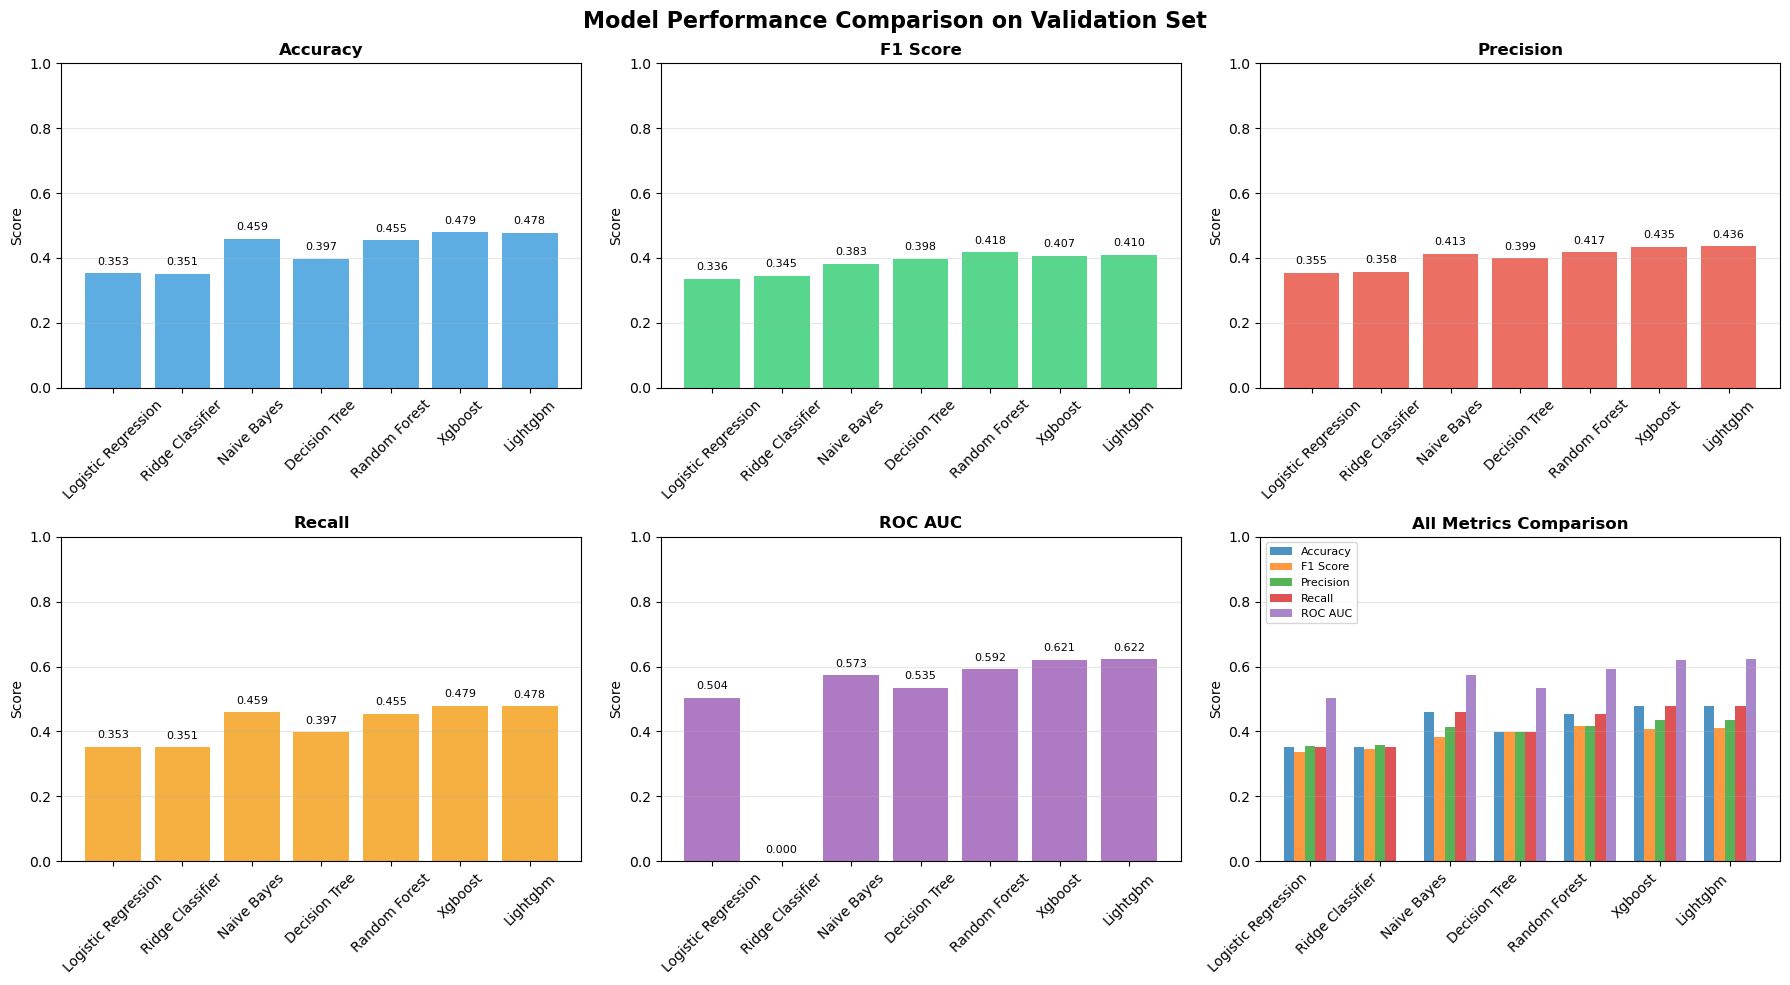


SAVING MODELS AND RESULTS
Save directory: models/2025-10-28_14-20-17

Saving models to models/2025-10-28_14-20-17/...
Scaler saved to: models/2025-10-28_14-20-17\scaler.joblib
Model saved to: models/2025-10-28_14-20-17\logistic_regression.joblib
Model saved to: models/2025-10-28_14-20-17\ridge_classifier.joblib
Model saved to: models/2025-10-28_14-20-17\naive_bayes.joblib
Model saved to: models/2025-10-28_14-20-17\decision_tree.joblib
Model saved to: models/2025-10-28_14-20-17\random_forest.joblib
Model saved to: models/2025-10-28_14-20-17\xgboost.joblib
Model saved to: models/2025-10-28_14-20-17\lightgbm.joblib

✓ All models and scaler saved successfully!
Best model saved to: models/2025-10-28_14-20-17\xgboost_best.joblib
Training results saved to: models/2025-10-28_14-20-17\training_results_summary.csv
Training config saved to: models/2025-10-28_14-20-17\training_config.txt
Training plot copied to: models/2025-10-28_14-20-17\model_comparison_training.png


✓ Training complete! Best 

In [18]:
# Train models
print('Starting model training...')
models, scaler, train_results, best_model_name, label_encoder = train(
    X, y,
    target_bars=15,
    target_pct=3.0,
    use_smote=False,
    use_gpu=False,
    n_jobs=-1,
    use_mlflow=False  # Disable MLflow for notebook
)

print(f'\n✓ Training complete! Best model: {best_model_name}')

## 4. Training Results Summary

In [20]:
# Print model summary
print_model_summary(train_results)


MODEL PERFORMANCE SUMMARY

              Model Accuracy F1 Score Precision Recall ROC AUC
            xgboost   0.4790   0.4066    0.4351 0.4790  0.6214
           lightgbm   0.4779   0.4099    0.4358 0.4779  0.6223
        naive_bayes   0.4595   0.3826    0.4130 0.4595  0.5728
      random_forest   0.4547   0.4178    0.4173 0.4547  0.5915
      decision_tree   0.3972   0.3978    0.3985 0.3972  0.5350
logistic_regression   0.3531   0.3363    0.3549 0.3531  0.5037
   ridge_classifier   0.3509   0.3445    0.3576 0.3509  0.0000




## 5. Confusion Matrix - Training Set

Shows how well each model classifies the three classes on the validation set.

In [22]:
from src.model_evaluation import print_confusion_matrix_summary

# Print confusion matrix summary for training
print_confusion_matrix_summary(train_results)


CONFUSION MATRIX SUMMARY (Validation Set)
              Model  Total  Pred Short  Pred Flat  Pred Long  Correct Short  Correct Flat  Correct Long  Total Correct  Total Wrong Accuracy     F1
      Random Forest  12902        1755       8507       2640            538          4361           968           5867         7035   0.4547 0.4178
           Lightgbm  12902         833       9888       2181            291          4993           882           6166         6736   0.4779 0.4099
            Xgboost  12902         727      10024       2151            251          5054           875           6180         6722   0.4790 0.4066
      Decision Tree  12902        3326       5752       3824            964          2906          1255           5125         7777   0.3972 0.3978
        Naive Bayes  12902         920      10397       1585            288          5017           623           5928         6974   0.4595 0.3826
   Ridge Classifier  12902        5212       5620       2070         

## 6. Test Models on Future Data

Testing models on future data...
Test labels encoded: [-1, 0, 1] -> [0, 1, 2]

TESTING ON HELD-OUT TEST DATA
Test dataset shape: (7169, 10)
Test target distribution (original):
target
-1    1473
 0    4003
 1    1693
Name: count, dtype: int64
Test target distribution (encoded):
0    1473
1    4003
2    1693
Name: count, dtype: int64


Model: LOGISTIC_REGRESSION

Test Set Performance:
  Accuracy:  0.3731
  F1 Score:  0.3773
  Precision: 0.4038
  Recall:    0.3731
  ROC AUC:   0.4971

Classification Report:
              precision    recall  f1-score   support

  Short (-1)       0.20      0.38      0.26      1473
    Flat (0)       0.56      0.48      0.51      4003
    Long (1)       0.22      0.12      0.15      1693

    accuracy                           0.37      7169
   macro avg       0.33      0.33      0.31      7169
weighted avg       0.40      0.37      0.38      7169


Model: RIDGE_CLASSIFIER

Test Set Performance:
  Accuracy:  0.3623
  F1 Score:  0.3732
  Precision: 0.4025


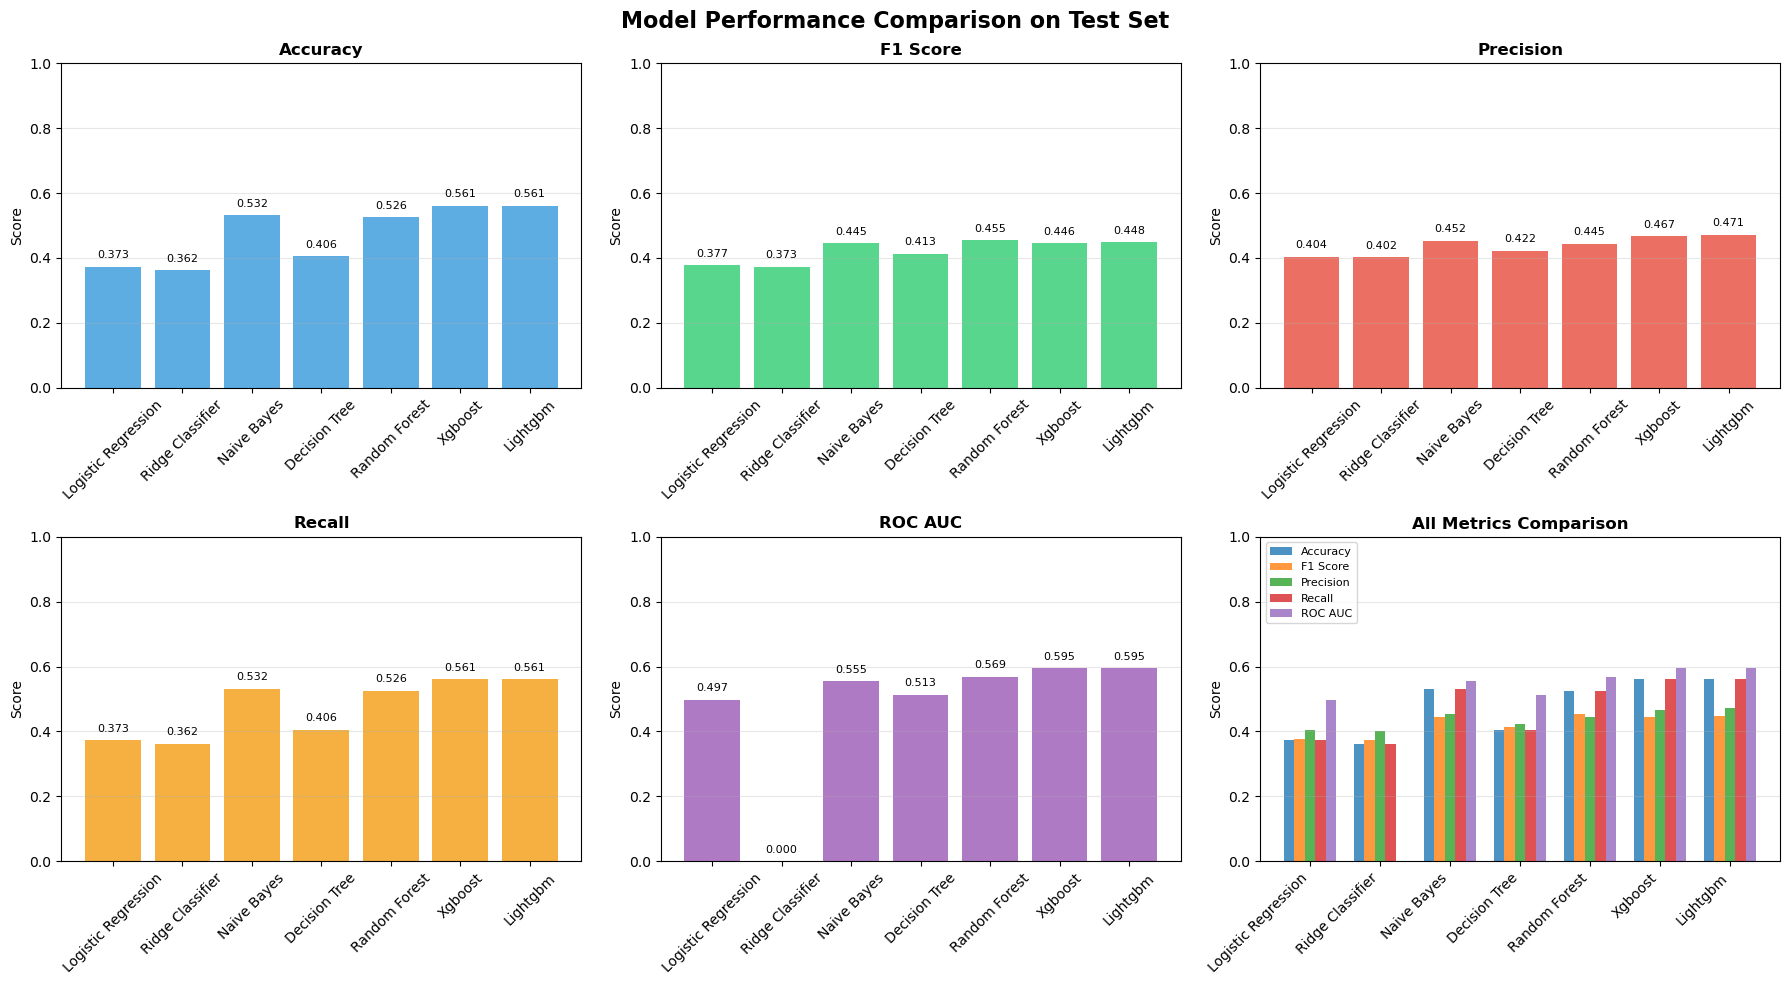


✓ Testing complete!


In [28]:
# Test on future data
print('Testing models on future data...')
test_results = test(models, scaler, X_test, y_test, label_encoder)
print('\n✓ Testing complete!')

## 7. Confusion Matrix - Test Set

In [30]:
# Print confusion matrix summary for test
print_confusion_matrix_summary(test_results)


CONFUSION MATRIX SUMMARY (Validation Set)
              Model  Total  Pred Short  Pred Flat  Pred Long  Correct Short  Correct Flat  Correct Long  Total Correct  Total Wrong Accuracy     F1
      Random Forest   7169         561       5892        716            136          3417           215           3768         3401   0.5256 0.4553
           Lightgbm   7169         193       6613        363             52          3827           142           4021         3148   0.5609 0.4480
            Xgboost   7169         179       6639        351             43          3841           140           4024         3145   0.5613 0.4461
        Naive Bayes   7169         698       6174        297            168          3542           104           3814         3355   0.5320 0.4452
      Decision Tree   7169        1648       3681       1840            331          2138           442           2911         4258   0.4061 0.4134
Logistic Regression   7169        2821       3435        913         

## 8. Compare Training vs Test Results

In [32]:
# Create comparison dataframe
comparison_data = []
for model_name in train_results.keys():
    if model_name in test_results:
        comparison_data.append({
            'Model': model_name.replace('_', ' ').title(),
            'Train Acc': f"{train_results[model_name]['accuracy']:.4f}",
            'Test Acc': f"{test_results[model_name]['accuracy']:.4f}",
            'Train F1': f"{train_results[model_name]['f1']:.4f}",
            'Test F1': f"{test_results[model_name]['f1']:.4f}",
            'Acc Diff': f"{train_results[model_name]['accuracy'] - test_results[model_name]['accuracy']:.4f}"
        })

df_comparison = pd.DataFrame(comparison_data)
print('\nTraining vs Test Performance:')
print(df_comparison.to_string(index=False))


Training vs Test Performance:
              Model Train Acc Test Acc Train F1 Test F1 Acc Diff
Logistic Regression    0.3531   0.3731   0.3363  0.3773  -0.0200
   Ridge Classifier    0.3509   0.3623   0.3445  0.3732  -0.0114
        Naive Bayes    0.4595   0.5320   0.3826  0.4452  -0.0725
      Decision Tree    0.3972   0.4061   0.3978  0.4134  -0.0088
      Random Forest    0.4547   0.5256   0.4178  0.4553  -0.0709
            Xgboost    0.4790   0.5613   0.4066  0.4461  -0.0823
           Lightgbm    0.4779   0.5609   0.4099  0.4480  -0.0830


## 9. Visualize Results

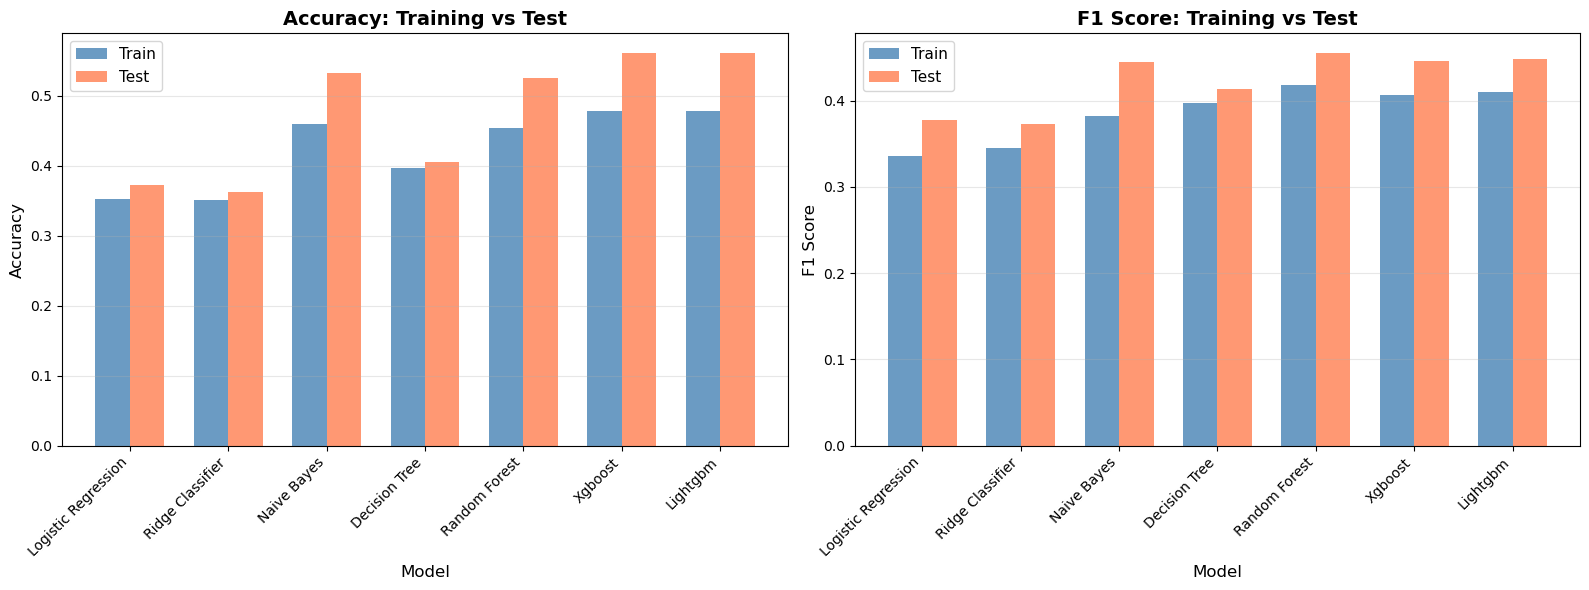

In [34]:
# Extract numeric values for plotting
train_acc = [train_results[m]['accuracy'] for m in train_results.keys() if m in test_results]
test_acc = [test_results[m]['accuracy'] for m in train_results.keys() if m in test_results]
train_f1 = [train_results[m]['f1'] for m in train_results.keys() if m in test_results]
test_f1 = [test_results[m]['f1'] for m in train_results.keys() if m in test_results]
model_names = [m.replace('_', ' ').title() for m in train_results.keys() if m in test_results]

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
x = np.arange(len(model_names))
width = 0.35
axes[0].bar(x - width/2, train_acc, width, label='Train', alpha=0.8, color='steelblue')
axes[0].bar(x + width/2, test_acc, width, label='Test', alpha=0.8, color='coral')
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy: Training vs Test', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# F1 Score comparison
axes[1].bar(x - width/2, train_f1, width, label='Train', alpha=0.8, color='steelblue')
axes[1].bar(x + width/2, test_f1, width, label='Test', alpha=0.8, color='coral')
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('F1 Score', fontsize=12)
axes[1].set_title('F1 Score: Training vs Test', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Best Model Analysis

In [36]:
print(f'Best Model (Training): {best_model_name.upper()}')
print(f'\nBest Model Metrics:')
print(f'  Training Accuracy:  {train_results[best_model_name]["accuracy"]:.4f}')
print(f'  Training F1 Score:  {train_results[best_model_name]["f1"]:.4f}')
print(f'  Training Precision: {train_results[best_model_name]["precision"]:.4f}')
print(f'  Training Recall:    {train_results[best_model_name]["recall"]:.4f}')
print(f'  Training ROC AUC:   {train_results[best_model_name]["roc_auc"]:.4f}')
print(f'\n  Test Accuracy:      {test_results[best_model_name]["accuracy"]:.4f}')
print(f'  Test F1 Score:      {test_results[best_model_name]["f1"]:.4f}')
print(f'  Test Precision:     {test_results[best_model_name]["precision"]:.4f}')
print(f'  Test Recall:        {test_results[best_model_name]["recall"]:.4f}')
print(f'  Test ROC AUC:       {test_results[best_model_name]["roc_auc"]:.4f}')

Best Model (Training): XGBOOST

Best Model Metrics:
  Training Accuracy:  0.4790
  Training F1 Score:  0.4066
  Training Precision: 0.4351
  Training Recall:    0.4790
  Training ROC AUC:   0.6214

  Test Accuracy:      0.5613
  Test F1 Score:      0.4461
  Test Precision:     0.4666
  Test Recall:        0.5613
  Test ROC AUC:       0.5952


## 11. Label Encoding Information

The models use encoded labels internally for sklearn compatibility.

In [38]:
print('Label Encoding Mapping:')
print(f'  Original classes: {sorted(label_encoder.classes_)}')
print(f'  Encoded classes:  {sorted(label_encoder.transform(label_encoder.classes_))}')
print(f'\nMapping:')
for orig, enc in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    class_name = {-1: 'Short', 0: 'Flat', 1: 'Long'}[orig]
    print(f'  {orig:2d} ({class_name:5s}) -> {enc}')

Label Encoding Mapping:
  Original classes: [-1, 0, 1]
  Encoded classes:  [0, 1, 2]

Mapping:
  -1 (Short) -> 0
   0 (Flat ) -> 1
   1 (Long ) -> 2


## Summary

This notebook demonstrated:
1. ✓ Loading training and test data
2. ✓ Training multiple ML models with 3-class classification
3. ✓ Evaluating models with confusion matrices
4. ✓ Testing on future data
5. ✓ Comparing training vs test performance
6. ✓ Visualizing results

All models are now trained and ready for predictions!

In [ ]:
#OTUS 15

def add_target(df):
    df['close_next_hour'] = df['close'].shift(-1)
    df['target'] = (df['close_next_hour'] > df['close']).astype(int)
    df = df.dropna(subset=['close_next_hour'])
    return df


def filter_invalid_targets(df):
    # Удаляем строки, где close_next_hour или target равен NaN
    return df.dropna(subset=['close_next_hour', 'target'])


def create_trend_features(df, features, lag_periods):
    """
    Добавляет классические финансовые признаки: отношение к предыдущим периодам, логарифмические изменения и индикаторы трендов.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить индикаторы
    lag_periods: сколько периодов назад учитывать для расчетов
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    for feature in features:
        # Отношение текущего значения к предыдущему (лаг = 1)
        df[f'{feature}_ratio_1'] = df[feature] / df[feature].shift(1)
        new_columns.append(f'{feature}_ratio_1')
        
        # Логарифмическое изменение (логарифм отношения текущего значения к предыдущему)
        df[f'{feature}_log_diff_1'] = np.log(df[feature] / df[feature].shift(1))
        new_columns.append(f'{feature}_log_diff_1')
        
        # Momentum (разница между текущим значением и значением N периодов назад)
        df[f'{feature}_momentum_{lag_periods}'] = df[feature] - df[feature].shift(lag_periods)
        new_columns.append(f'{feature}_momentum_{lag_periods}')
        
        # Rate of Change (ROC): процентное изменение за N периодов
        df[f'{feature}_roc_{lag_periods}'] = (df[feature] - df[feature].shift(lag_periods)) / df[feature].shift(lag_periods) * 100
        new_columns.append(f'{feature}_roc_{lag_periods}')
        
        # Exponential Moving Average (EMA) с периодом N
        df[f'{feature}_ema_{lag_periods}'] = df[feature].ewm(span=lag_periods, adjust=False).mean()
        new_columns.append(f'{feature}_ema_{lag_periods}')
    
    # Удаление строк с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns


def create_rolling_features(df, features, window_sizes):
    """
    Добавляет скользящие характеристики для указанных признаков и окон.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить скользящие характеристики
    window_sizes: список размеров окон для расчета характеристик (например, [5, 14, 30])
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    # Для каждого признака и для каждого окна
    for feature in features:
        for window_size in window_sizes:
            # Скользящее среднее
            df[f'{feature}_mean_{window_size}'] = df[feature].rolling(window=window_size).mean()
            new_columns.append(f'{feature}_mean_{window_size}')
            
            # Скользящая медиана
            df[f'{feature}_median_{window_size}'] = df[feature].rolling(window=window_size).median()
            new_columns.append(f'{feature}_median_{window_size}')
            
            # Скользящий минимум
            df[f'{feature}_min_{window_size}'] = df[feature].rolling(window=window_size).min()
            new_columns.append(f'{feature}_min_{window_size}')
            
            # Скользящий максимум
            df[f'{feature}_max_{window_size}'] = df[feature].rolling(window=window_size).max()
            new_columns.append(f'{feature}_max_{window_size}')
            
            # Скользящее стандартное отклонение
            df[f'{feature}_std_{window_size}'] = df[feature].rolling(window=window_size).std()
            new_columns.append(f'{feature}_std_{window_size}')
            
            # Скользящий размах (макс - мин)
            df[f'{feature}_range_{window_size}'] = df[f'{feature}_max_{window_size}'] - df[f'{feature}_min_{window_size}']
            new_columns.append(f'{feature}_range_{window_size}')
            
            # Скользящее абсолютное отклонение от медианы (mad)
            df[f'{feature}_mad_{window_size}'] = df[feature].rolling(window=window_size).apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
            new_columns.append(f'{feature}_mad_{window_size}')
    
    # Удаление строк с NaN значениями, которые появляются из-за сдвигов
    df = df.dropna()
    
    return df, new_columns

def create_macd(df, feature, short_window=12, long_window=26):
    """
    Добавляет индикатор MACD (разница между краткосрочным и долгосрочным EMA).
    
    df: DataFrame с исходными данными
    feature: признак, для которого необходимо рассчитать MACD
    short_window: окно для краткосрочного EMA (по умолчанию 12)
    long_window: окно для долгосрочного EMA (по умолчанию 26)
    
    Возвращает:
    - обновленный DataFrame с MACD
    - название новой колонки с MACD
    """
    df = df.copy()
    
    # Рассчитываем краткосрочное и долгосрочное EMA
    ema_short = df[feature].ewm(span=short_window, adjust=False).mean()
    ema_long = df[feature].ewm(span=long_window, adjust=False).mean()
    
    # Разница между краткосрочным и долгосрочным EMA (MACD)
    df[f'{feature}_macd'] = ema_short - ema_long
    
    return df, f'{feature}_macd'


